## You have been hired by a rookie movie producer to help him decide what type of movies to produce and which actors to cast. You have to back your recommendations based on thorough analysis of the data he shared with you which has the list of 3000 movies and the corresponding details.

## As a data scientist, you have to first explore the data and check its sanity.

## Further, you have to answer the following questions:
1. ### <b> Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</b>
2. ### <b>This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)? </b>
3. ### <b> Find out the unique genres of movies in this dataset.</b>
4. ### <b> Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI? </b>
5. ### <b> Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor. </b>
6. ### <b>Top 3 directors prefer which actors the most? </b>



# Data Exploration

In [ ]:
#Import package
import ast

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/imdb_data.csv", index_col = False)
print("Data Shape :", data.shape)
data.head().T

Data Shape : (3000, 23)


,0,1,2,3,4
id,1,2,3,4,5
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN,NaN,NaN
budget,14000000,40000000,3300000,1200000,0
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
homepage,NaN,NaN,http://sonyclassics.com/whiplash/,http://kahaanithefilm.com/,NaN
imdb_id,tt2637294,tt0368933,tt2582802,tt1821480,tt1380152
original_language,en,en,en,hi,ko
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,Kahaani,마린보이
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ...",Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,Marine Boy is the story of a former national s...
popularity,6.575393,8.248895,64.29999,3.174936,1.14807


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
for r in data.values[:1]:
    print(r)

[1
 "[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"
 14000000 "[{'id': 35, 'name': 'Comedy'}]" nan 'tt2637294' 'en'
 'Hot Tub Time Machine 2'
 'When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.'
 6.575393 '/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg'
 "[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"
 "[{'iso_3166_1': 'US', 'name': 'United States of America'}]" '2/20/15'
 93.0 "[{'iso_639_1': 'en', 'name': 'English'}]" 'Released'
 'The Laws of Space and Time are About to be Violated.'
 'Hot Tub Time Machine 2'
 "[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]"
 "[{'cast_id': 4, 'character': 'L

## Solutions

## 1. Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.

In [ ]:
# Getting the Profit
data['profit'] = data['revenue'] - data['budget']

data[['revenue', 'budget', 'profit']].head()

,revenue,budget,profit
0,12314651,14000000,-1685349
1,95149435,40000000,55149435
2,13092000,3300000,9792000
3,16000000,1200000,14800000
4,3923970,0,3923970


In [ ]:
def get_director(temp):
    try:
        temp_eval = ast.literal_eval(temp)
        for d in temp_eval:
            if d['job'] == "Director":
                d_name = d["name"]
        return d_name
    except:
        return temp

data['director'] = data['crew'].map(get_director)

In [ ]:
def get_producer(temp):
    try:
        temp_eval = ast.literal_eval(temp)
        for d in temp_eval:
            if d['job'] == "Producer":
                d_name = d["name"]
        return d_name
    except:
        return temp
        
data['producer'] = data['crew'].map(get_producer)

In [ ]:
def get_producer_list(temp):
    try:
        producer_list = []
        temp_eval = ast.literal_eval(temp)
        for d in temp_eval:
            if d['job'] == "Producer":
                d_name = d["name"]
                producer_list.append(d_name)
        return producer_list
    except:
        return []
        
data['producer_list'] = data['crew'].map(get_producer_list)

In [ ]:
# Highest Profit

profit_max = data['profit'].max()

cond = data['profit'] == profit_max
data[cond][['original_title', 'profit', 'director', 'producer']]

,original_title,profit,director,producer
1761,Furious 7,1316249360,James Wan,Brandon Birtell


In [ ]:
# HW: Get the movies with the highest profit (top 10) with director & producer

## 2.This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)?


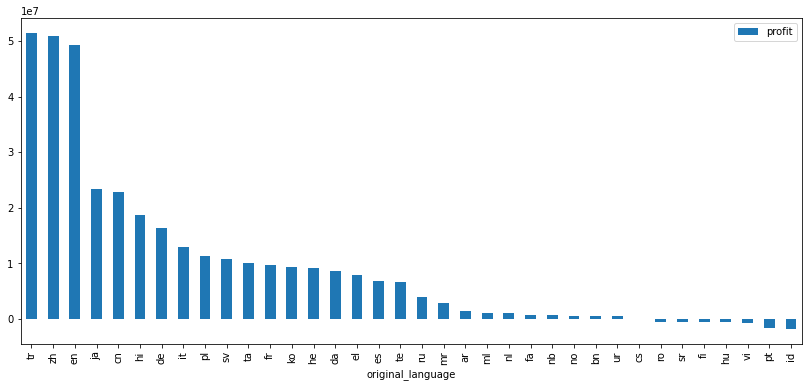

In [ ]:
lang_profit = data.groupby('original_language')['profit'].mean().astype(int).reset_index()
lang_profit = lang_profit.sort_values(by ='profit', ascending = False)

lang_profit.plot(x='original_language',
                 y='profit',
                 kind='bar',
                 figsize = (14, 6))

# HW: Plot this using  Seaborn & Plotly

## 3.Find out the unique genres of movies in this dataset.

In [ ]:
temp = data['genres'].iloc[1]

# Mine Genres out of list of dict
def get_genres(temp):
    try:
        temp_eval = ast.literal_eval(temp)
        g_list = []
        for d in temp_eval:
            genre_ = d['name']
            g_list.append(genre_)

        return g_list
    except:
        return []

data['genre_list'] = data['genres'].map(get_genres)

In [ ]:
data['unique_genre'] = data['genre_list'].map(len)
data.head().T

,0,1,2,3,4
id,1,2,3,4,5
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN,NaN,NaN
budget,14000000,40000000,3300000,1200000,0
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
homepage,NaN,NaN,http://sonyclassics.com/whiplash/,http://kahaanithefilm.com/,NaN
imdb_id,tt2637294,tt0368933,tt2582802,tt1821480,tt1380152
original_language,en,en,en,hi,ko
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,Kahaani,마린보이
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ...",Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,Marine Boy is the story of a former national s...
popularity,6.575393,8.248895,64.29999,3.174936,1.14807


In [ ]:
data_genre = data[['imdb_id', 'original_title', 'genre_list']]
# Long Format - using explode
data_genre = data_genre.explode('genre_list')

data_genre

,imdb_id,original_title,genre_list
0,tt2637294,Hot Tub Time Machine 2,Comedy
1,tt0368933,The Princess Diaries 2: Royal Engagement,Comedy
1,tt0368933,The Princess Diaries 2: Royal Engagement,Drama
1,tt0368933,The Princess Diaries 2: Royal Engagement,Family
1,tt0368933,The Princess Diaries 2: Royal Engagement,Romance
...,...,...,...
2998,tt0343135,Along Came Polly,Comedy
2998,tt0343135,Along Came Polly,Romance
2999,tt1600195,Abduction,Thriller
2999,tt1600195,Abduction,Action


## 5. Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor.

In [ ]:
# Mine Genres out of list of dict
def get_actors(temp):
    try:
        temp_eval = ast.literal_eval(temp)
        a_list = []
        for d in temp_eval:
            actor_ = d['name']
            a_list.append(actor_)

        return a_list
    except:
        return []

data['actor_list'] = data['cast'].map(get_actors)

In [ ]:
data_actor = data[['imdb_id', 'original_title', 'actor_list']]
# Long Format - using explode
data_actor = data_actor.explode('actor_list')

data_actor

,imdb_id,original_title,actor_list
0,tt2637294,Hot Tub Time Machine 2,Rob Corddry
0,tt2637294,Hot Tub Time Machine 2,Craig Robinson
0,tt2637294,Hot Tub Time Machine 2,Clark Duke
0,tt2637294,Hot Tub Time Machine 2,Adam Scott
0,tt2637294,Hot Tub Time Machine 2,Chevy Chase
...,...,...,...
2999,tt1600195,Abduction,Jack Erdie
2999,tt1600195,Abduction,Steve Blass
2999,tt1600195,Abduction,Derek Burnell
2999,tt1600195,Abduction,Tiffany Sander McKenzie


In [ ]:
actor_movie = data_actor.groupby('actor_list')['imdb_id'].nunique().reset_index()
actor_movie.sort_values(by = 'imdb_id', ascending=False).head(5)

,actor_list,imdb_id
30927,Robert De Niro,30
32323,Samuel L. Jackson,30
26518,Morgan Freeman,27
34668,Susan Sarandon,25
4858,Bruce Willis,25


In [ ]:
actor_movie_max = actor_movie['imdb_id'].max()

cond = actor_movie['imdb_id'] == actor_movie_max
actor_names = actor_movie[cond]

actor_max_movies = actor_names['actor_list'].tolist()[0]
actor_max_movies

'Robert De Niro'

In [ ]:
cond = data_actor['actor_list'] == actor_max_movies
data_f = data_actor[cond]
data_f

,imdb_id,original_title,actor_list
409,tt0108330,This Boy’s Life,Robert De Niro
506,tt0486674,What Just Happened,Robert De Niro
553,tt0107473,Mad Dog and Glory,Robert De Niro
704,tt0343737,The Good Shepherd,Robert De Niro
752,tt0175844,Lenny Bruce: Swear to Tell the Truth,Robert De Niro
805,tt1748179,Red Lights,Robert De Niro
1170,tt0087233,Falling in Love,Robert De Niro
1192,tt0120885,Wag the Dog,Robert De Niro
1217,tt0212338,Meet the Parents,Robert De Niro
1374,tt0116999,Marvin's Room,Robert De Niro


In [ ]:
data_s = data[['imdb_id', 'genre_list', 'profit']]

data_actor_max_movies = data_f.merge(data_s,
                                      on ='imdb_id',
                                      how='inner')
data_actor_max_movies

,imdb_id,original_title,actor_list,genre_list,profit
0,tt0108330,This Boy’s Life,Robert De Niro,[Drama],4104962
1,tt0486674,What Just Happened,Robert De Niro,"[Comedy, Drama]",-18326578
2,tt0107473,Mad Dog and Glory,Robert De Niro,"[Comedy, Crime, Romance, Drama]",11081586
3,tt0343737,The Good Shepherd,Robert De Niro,"[Drama, Thriller, History]",-25091435
4,tt0175844,Lenny Bruce: Swear to Tell the Truth,Robert De Niro,"[Comedy, Documentary]",21350
5,tt1748179,Red Lights,Robert De Niro,[Thriller],-448826
6,tt0087233,Falling in Love,Robert De Niro,"[Drama, Romance]",11129057
7,tt0120885,Wag the Dog,Robert De Niro,"[Comedy, Drama]",49256513
8,tt0212338,Meet the Parents,Robert De Niro,"[Comedy, Romance]",275444045
9,tt0116999,Marvin's Room,Robert De Niro,[Drama],-10196695


In [ ]:
data_actor_max_movies[['profit']].describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
profit,30,30043750,67832808,-36373581,30156,5947112,33168290,275444045


In [ ]:
data_actor_max_movies['genre_list'].explode().value_counts()

Drama          21
Crime          11
Comedy         10
Thriller       10
Romance         5
Action          5
Mystery         3
History         1
Documentary     1
Horror          1
War             1
Name: genre_list, dtype: int64

## 5. Top 3 directors prefer which actors the most?

In [ ]:
# Top 3 directors ???
## sum of profit
## Avg of profit

# Atleast 5 movies

director_v = data.groupby('director').agg({"profit":['mean', 'sum', 'count']}).astype(int).reset_index()
director_v.columns  = ['director', 'profit_mean', 'profit_sum', 'movie_count']

# Atleas 5 movies
director_v_f = director_v[director_v['movie_count']>=5]
kpi_col = 'profit_mean'
director_v_f = director_v_f.sort_values(by = kpi_col, ascending=False)

top_3_director = director_v_f.head(4)

top_3_director

,director,profit_mean,profit_sum,movie_count
1342,Peter Jackson,496577733,3476044134,7
728,James Wan,400221127,2001105637,5
1167,Michael Bay,372844056,2982752453,8
1667,Steven Spielberg,347990522,3479905229,10


In [ ]:
# Filtering the imdb data | top 3 director
data_s = data[data['director'].isin(top_3_director['director'])]
data_s = data_s[['imdb_id', 'original_title', 'director', 'actor_list']]
# long Format
data_s = data_s.explode('actor_list')

In [ ]:
# Top 10 Actors for each director
data_s.groupby('director').apply(lambda x: x['actor_list'].value_counts().head(10))

director                              
James Wan         Steve Coulter           3
                  Patrick Wilson          2
                  Leigh Whannell          2
                  Joseph Bishara          2
                  Sterling Jerins         2
                  Shannon Kook            2
                  John Brotherton         2
                  Vera Farmiga            2
                  Brian Mahoney           1
                  Brittney Alger          1
Michael Bay       Mark Ryan               4
                  Josh Duhamel            4
                  Frank Welker            4
                  Glenn Morshower         4
                  Peter Cullen            4
                  Jess Harnell            4
                  Reno Wilson             4
                  John Turturro           4
                  Hugo Weaving            3
                  Tyrese Gibson           3
Peter Jackson     Cate Blanchett          4
                  Jed Brophy         

# Utils

In [ ]:
# Convert a string representation of list to a list
x = [1, 2, 3]
print(type(x))

y = "[1, 2, 3]"
print(type(y))

y_list = ast.literal_eval(y)
print(type(y_list))

<class 'list'>
<class 'str'>
<class 'list'>
